In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('E:\\mbti_1.csv')

In [4]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
df.isnull().sum()

type     0
posts    0
dtype: int64

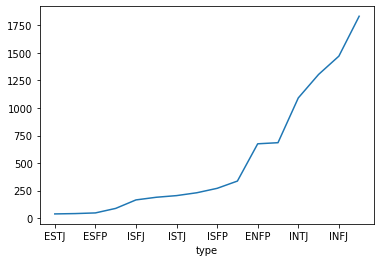

In [6]:
g=df.groupby('type')['type'].agg('count').sort_values()
g.plot()

In [7]:
g

type
ESTJ      39
ESFJ      42
ESFP      48
ESTP      89
ISFJ     166
ENFJ     190
ISTJ     205
ENTJ     231
ISFP     271
ISTP     337
ENFP     675
ENTP     685
INTJ    1091
INTP    1304
INFJ    1470
INFP    1832
Name: type, dtype: int64

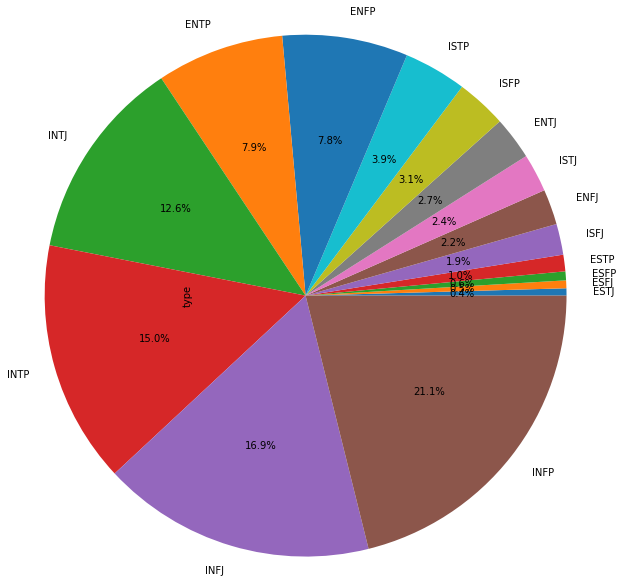

In [145]:
g.plot(kind='pie',radius=3,autopct='%0.1f%%')

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df['label_type']=le.fit_transform(df['type'])
title=['type','label_type','posts']
df.reindex(columns=title)

,type,label_type,posts
0,INFJ,8,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,3,'I'm finding the lack of me in these posts ver...
2,INTP,11,'Good one _____ https://www.youtube.com/wat...
3,INTJ,10,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,2,'You're fired.|||That's another silly misconce...
...,...,...,...
8670,ISFP,13,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,1,'So...if this thread already exists someplace ...
8672,INTP,11,'So many questions when i do these things. I ...
8673,INFP,9,'I am very conflicted right now when it comes ...


In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}


In [11]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_word=set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [12]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [13]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [103]:
def preprocess(data):
    
    
    data=re.sub(r"https\S+|www\S+|http\S+","",data,flags=re.MULTILINE)
    data=data.translate(str.maketrans("","",string.punctuation))
    data=re.sub(r"\@\w+|\#","",data)
    data_token=word_tokenize(data)
    filtered_data=[word for word in data_token if word not in stop_word]
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_data]
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a')for w in stemmed_words]
    
    return " ".join(lemma_words)

In [15]:
import numpy as np

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [157]:
tfidf=TfidfVectorizer(use_idf=True,smooth_idf=True)
y=df['label_type'].values
X=tfidf.fit_transform(df['posts'].values.astype('U'))



In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
X_train.shape


(5205, 145412)

In [21]:
X_test.shape

(3470, 145412)

In [20]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
pred=lr.predict(X_test)
pred

array([ 8,  9,  9, ...,  9, 11, 11])

In [72]:

predic=pred.tolist()
predic[1:10]

[9, 9, 8, 9, 11, 8, 11, 10, 8]

In [75]:
predic[5:7]

[11, 8]

In [79]:
predic

[8,
 9,
 9,
 8,
 9,
 11,
 8,
 11,
 10,
 8,
 8,
 11,
 11,
 9,
 9,
 9,
 11,
 11,
 9,
 9,
 9,
 8,
 11,
 9,
 3,
 8,
 9,
 8,
 11,
 9,
 15,
 8,
 9,
 8,
 3,
 9,
 10,
 1,
 10,
 1,
 1,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 9,
 9,
 9,
 10,
 3,
 10,
 11,
 11,
 10,
 9,
 11,
 9,
 9,
 8,
 9,
 11,
 10,
 9,
 8,
 8,
 8,
 1,
 11,
 9,
 11,
 8,
 9,
 9,
 9,
 10,
 9,
 8,
 9,
 8,
 9,
 9,
 11,
 8,
 10,
 10,
 9,
 9,
 8,
 8,
 1,
 11,
 15,
 9,
 8,
 11,
 10,
 11,
 8,
 9,
 9,
 1,
 11,
 10,
 8,
 9,
 11,
 15,
 11,
 11,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 3,
 8,
 8,
 15,
 9,
 10,
 8,
 1,
 11,
 11,
 11,
 9,
 3,
 10,
 3,
 9,
 1,
 8,
 11,
 9,
 10,
 11,
 9,
 11,
 9,
 9,
 9,
 9,
 10,
 9,
 12,
 9,
 11,
 10,
 11,
 11,
 8,
 9,
 11,
 8,
 9,
 11,
 8,
 11,
 11,
 8,
 11,
 9,
 11,
 9,
 9,
 9,
 8,
 9,
 8,
 11,
 9,
 11,
 9,
 11,
 10,
 11,
 11,
 3,
 9,
 11,
 1,
 1,
 9,
 8,
 9,
 8,
 11,
 3,
 8,
 3,
 11,
 9,
 11,
 9,
 8,
 8,
 9,
 3,
 9,
 1,
 3,
 11,
 10,
 9,
 8,
 9,
 11,
 9,
 8,
 11,
 9,
 9,
 11,
 9,
 9,
 1,
 8,
 9,
 11,
 10,
 11,
 11,
 8,
 

In [82]:
predic[5:9]

[11, 8, 11, 10]

In [84]:
le.inverse_transform(predic)

array(['INFJ', 'INFP', 'INFP', ..., 'INFP', 'INTP', 'INTP'], dtype=object)

In [85]:
predic[9:15]

[8, 8, 11, 11, 9, 9]

In [88]:
predict123=le.inverse_transform(predic)

In [89]:
predict123[4:10]

array(['INFP', 'INTP', 'INFJ', 'INTP', 'INTJ', 'INFJ'], dtype=object)

In [201]:
lrs=lr.score(X_test,y_test)
lrs

0.6772334293948127

In [166]:
X_train.shape

(6940, 145412)

In [167]:
X_test.shape

(1735, 145412)

In [168]:
y_train.shape

(6940,)

In [169]:
y_test.shape

(1735,)

## 

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [203]:
rfs=clf1.score(X_test,y_test)
rfs

0.21498559077809798

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

cross_val_score(clf, X_train, y_train, cv=10)

array([0.45677233, 0.46253602, 0.47262248, 0.46829971, 0.44668588,
       0.49567723, 0.44956772, 0.4610951 , 0.45965418, 0.51008646])

In [192]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [202]:
dts=clf.score(X_test,y_test)
dts

0.47665706051873197

In [213]:
lrs

0.6772334293948127

In [214]:
lrscore=lrs

In [215]:
dtscore=dts

In [216]:
rfscore=rfs

In [218]:
plt.bar(lrscore,dtscore,rfscore,)

TypeError: bar() got multiple values for argument 'width'

In [219]:
df_new=pd.DataFrame({
    'model':['lr','rf','dt'],
    'score':[0.67,0.21,0.47]
})

In [220]:
df_new

,model,score
0,lr,0.67
1,rf,0.21
2,dt,0.47


<BarContainer object of 3 artists>

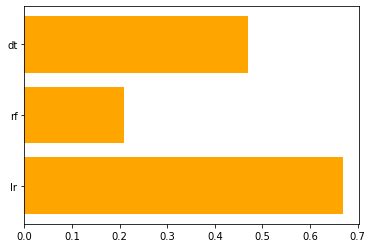

In [225]:
plt.barh(df_new['model'],df_new['score'],color='orange')